In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./pima-indians-diabetes.data.csv')

In [3]:
df.head(10)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [4]:
df.shape

(767, 9)

In [5]:
df.isnull().sum()

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

In [10]:
df =df.rename(columns={'6':'first','148':'second','72':'third','35':'fourth','0':'fifth','33.6':'sixth','0.627':'seveth','50':'eight','1':'ninth'})

In [11]:
df.head()

,first,second,third,fourth,fifth,sixth,seveth,eight,ninth
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## ho says each independent feature is not important

In [12]:
from scipy.stats import pearsonr

In [15]:
corr=[]
for i in df.columns:
    sol=pearsonr(df[i],df['ninth'])
    corr.append(sol)
corr =np.array(corr)    
print(corr)

[[2.21086528e-01 6.02764976e-10]
 [4.65855939e-01 1.40914192e-42]
 [6.48817790e-02 7.25187762e-02]
 [7.32649758e-02 4.25119303e-02]
 [1.31983756e-01 2.47006859e-04]
 [2.92695480e-01 1.28668938e-16]
 [1.73245353e-01 1.38808834e-06]
 [2.36417458e-01 3.33255459e-11]
 [1.00000000e+00 0.00000000e+00]]


In [16]:
corr[:,1]

array([6.02764976e-10, 1.40914192e-42, 7.25187762e-02, 4.25119303e-02,
       2.47006859e-04, 1.28668938e-16, 1.38808834e-06, 3.33255459e-11,
       0.00000000e+00])

In [17]:
p_value=pd.Series(corr[:,1],index =df.columns)
p_value

first     6.027650e-10
second    1.409142e-42
third     7.251878e-02
fourth    4.251193e-02
fifth     2.470069e-04
sixth     1.286689e-16
seveth    1.388088e-06
eight     3.332555e-11
ninth     0.000000e+00
dtype: float64

<AxesSubplot:>

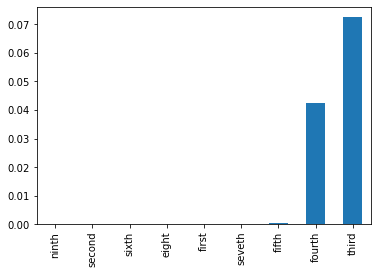

In [21]:
p_value.sort_values(ascending=True).plot.bar()

In [24]:
df= df.drop(['third'],axis=1)

In [25]:
df.head()

,first,second,fourth,fifth,sixth,seveth,eight,ninth
0,1,85,29,0,26.6,0.351,31,0
1,8,183,0,0,23.3,0.672,32,1
2,1,89,23,94,28.1,0.167,21,0
3,0,137,35,168,43.1,2.288,33,1
4,5,116,0,0,25.6,0.201,30,0


In [26]:
df =sns.load_dataset('titanic')

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
df=df[['sex','class','who','survived']]
df

,sex,class,who,survived
0,male,Third,man,0
1,female,First,woman,1
2,female,Third,woman,1
3,female,First,woman,1
4,male,Third,man,0
...,...,...,...,...
886,male,Second,man,0
887,female,First,woman,1
888,female,Third,woman,0
889,male,First,man,1


In [30]:
for i in df.columns:
    print(df[i].unique())

['male' 'female']
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
['man' 'woman' 'child']
[0 1]


In [37]:
df['sex']=df['sex'].map({'male':0,'female':1}).astype(int)
df['class']=df['class'].map({'first':1,'second':2,'third':0})
df['who']=df['who'].map({'man':0,'woman':1,'child':2})

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [36]:
df.head()

,sex,class,who,survived
0,NaN,NaN,0,0
1,NaN,NaN,1,1
2,NaN,NaN,1,1
3,NaN,NaN,1,1
4,NaN,NaN,0,0
